**Nabil Bintang Prayoga_G1401221017**

# ***Library***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# **Data**

In [5]:
data = pd.read_excel("Data Bintangg.xlsx")
print(data.head()) # menampilkan sekian data awal

                Wilayah    PPM    IPM   RLS    PBH    ASL   TPT   PDRB    PKB  \
0           Sumba Barat  27.17  65.22  6.92  11.90  58.83  3.52  10199  82.84   
1           Sumba Timur  28.08  67.05  7.57   5.87  61.81  2.21  16617  68.79   
2                Kupang  21.78  65.82  7.42   6.17  76.42  3.22  13793  72.78   
3  Timor Tengah Selatan  25.18  63.58  6.97   7.71  67.93  2.64  10953  83.83   
4    Timor Tengah Utara  21.85  65.16  8.16   3.98  80.56  1.96  11511  77.65   

          UHH  
0       Tahan  
1  Agak Tahan  
2  Agak Tahan  
3  Agak Tahan  
4       Tahan  


In [6]:
print(data.info()) # menampilkan tipe data setiap peubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wilayah  22 non-null     object 
 1   PPM      22 non-null     float64
 2   IPM      22 non-null     float64
 3   RLS      22 non-null     float64
 4   PBH      22 non-null     float64
 5   ASL      22 non-null     float64
 6   TPT      22 non-null     float64
 7   PDRB     22 non-null     int64  
 8   PKB      22 non-null     float64
 9   UHH      22 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ KB
None


In [7]:
print(data.describe()) # menampilkan ringkasan data setiap peubah

             PPM        IPM        RLS        PBH        ASL        TPT  \
count  22.000000  22.000000  22.000000  22.000000  22.000000  22.000000   
mean   20.635000  65.706818   7.796364   5.195000  74.775455   3.160455   
std     6.764348   4.035931   1.048062   3.626019  13.391926   1.098104   
min     8.610000  58.890000   6.380000   0.760000  48.220000   1.630000   
25%    14.330000  63.620000   7.032500   1.885000  64.052500   2.460000   
50%    21.815000  65.505000   7.665000   4.020000  80.310000   2.850000   
75%    26.582500  66.772500   8.155000   7.367500  84.677500   3.755000   
max    31.780000  80.620000  11.620000  13.390000  93.030000   5.690000   

               PDRB        PKB  
count     22.000000  22.000000  
mean   12470.772727  72.215455  
std     6298.809940  17.829808  
min     7706.000000   4.290000  
25%     9064.250000  68.490000  
50%    10797.000000  75.145000  
75%    13913.750000  82.307500  
max    38169.000000  93.270000  


Data yang digunakan adalah data dari 22 Kabupaten/Kota di Nusa Tenggara Timur pada Tahun 2022 dengan 1 peubah respon yaitu Persentase Penduduk Miskin (PPM) dan 8 peubah penjelas yang terdiri dari 7 peubah kuantitatif dan 1 peubah kualitatif. Peubah tersebut adalah Indeks Pembangunan Manusia (IPM), rata-rata lama sekolah (RLS), persentase penduduk buta huruf (PBH), persentase akses sanitasi layak (ASL), persentase tingkat pengangguran terbuka (TPT), Produk Domestik Regional Bruto (PDRB), persentase penduduk yang menggunakan kayu bakar (PKB), dan kategori umur harapan hidup (UHH).  
  
Untuk mempermudah dalam komputasi, karena peubah wilayah tidak digunakan, maka dapat dihapus. Pada praktikum kali ini akan dilakukan dua pemodelan, yakni model dengan seluruh peubah kuantitatif dan model dengan adanya peubah kualitatif, supaya lebih mudah dalam analisisnya maka akan dibentuk dua data berbeda.

In [9]:
data = data.drop(columns=["Wilayah"])
dt = data.drop(columns=["UHH"])

## **Eksplorasi Data**

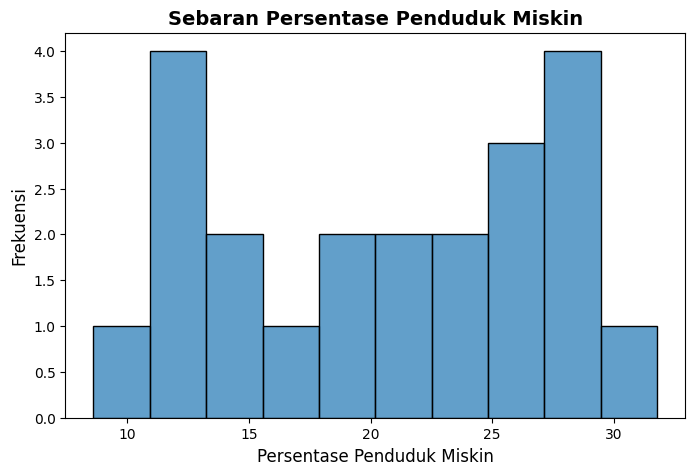

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(dt["PPM"], bins=10, alpha=0.7)

plt.title("Sebaran Persentase Penduduk Miskin", fontsize=14, fontweight='bold')
plt.xlabel("Persentase Penduduk Miskin", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

plt.show()

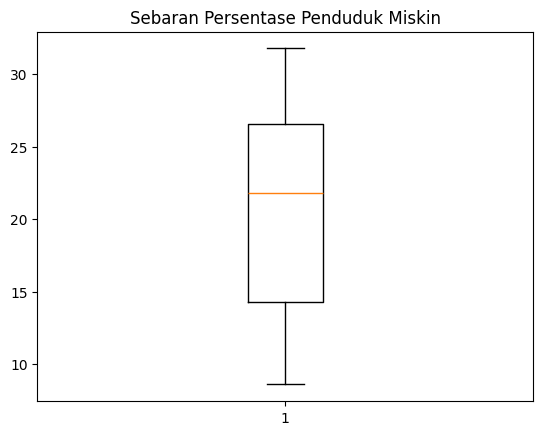

In [12]:
plt.boxplot(dt["PPM"])
plt.title("Sebaran Persentase Penduduk Miskin")
plt.show()

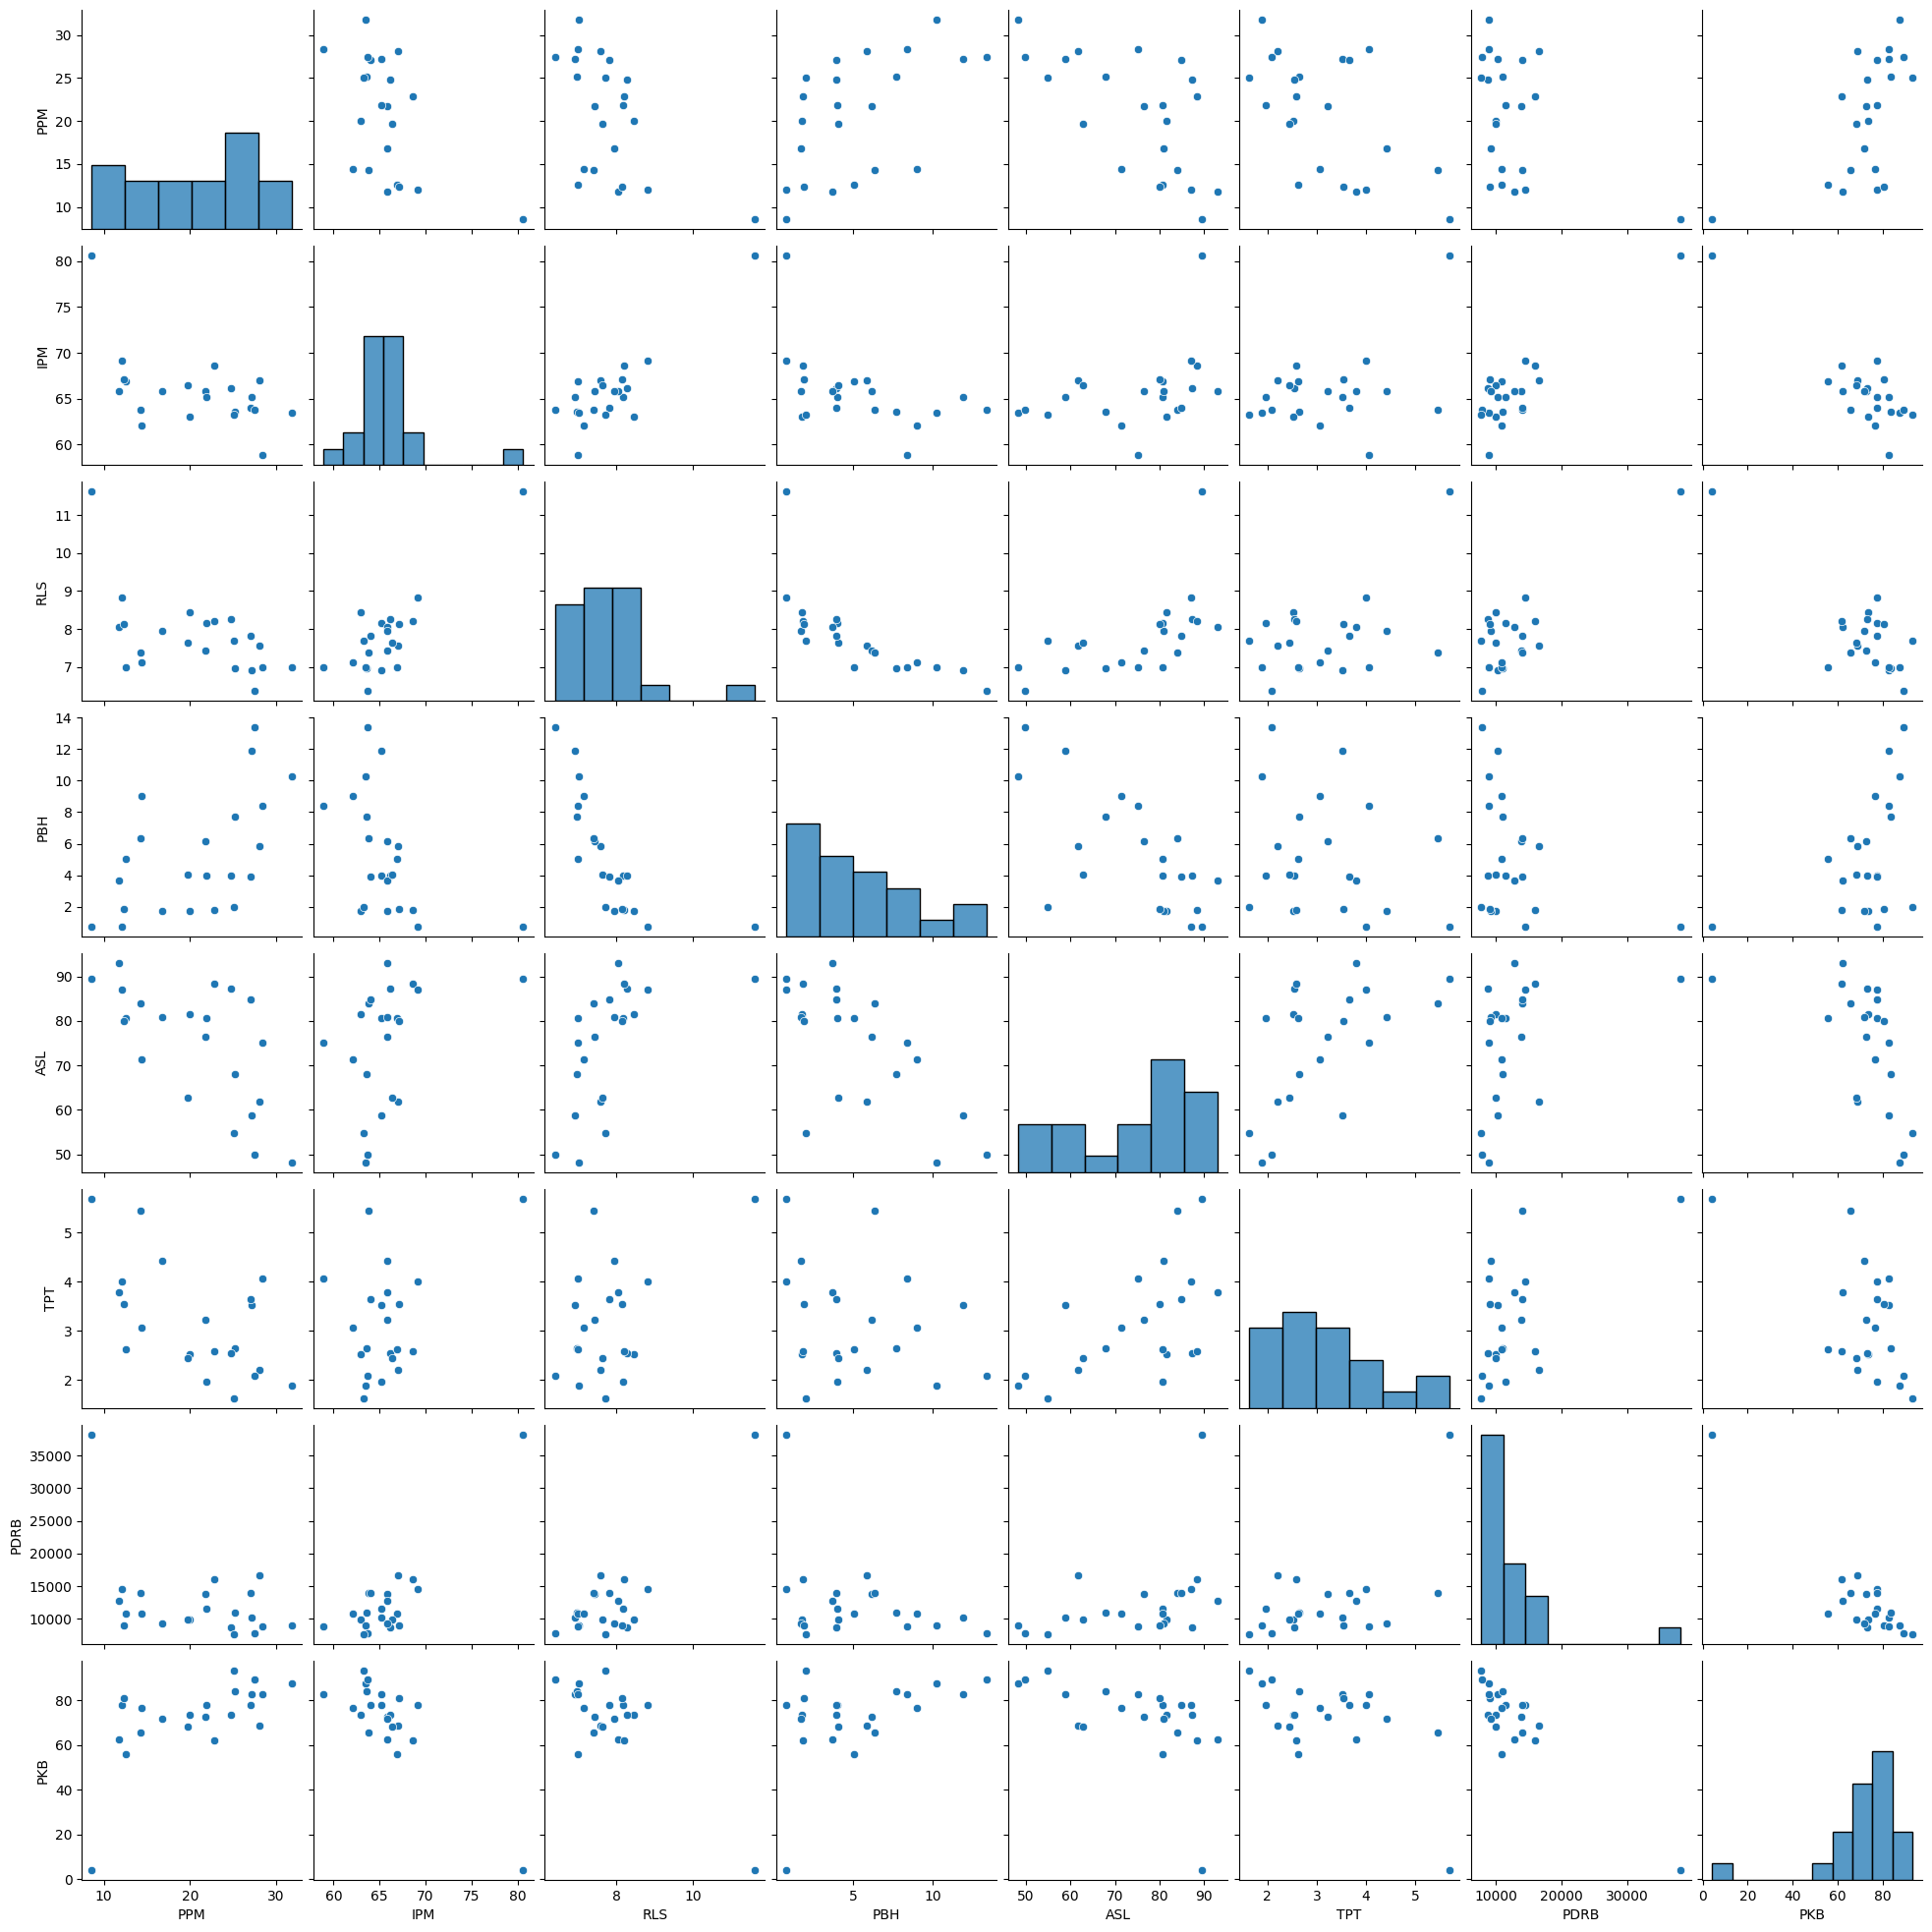

In [13]:
sns.pairplot(dt)
plt.show()

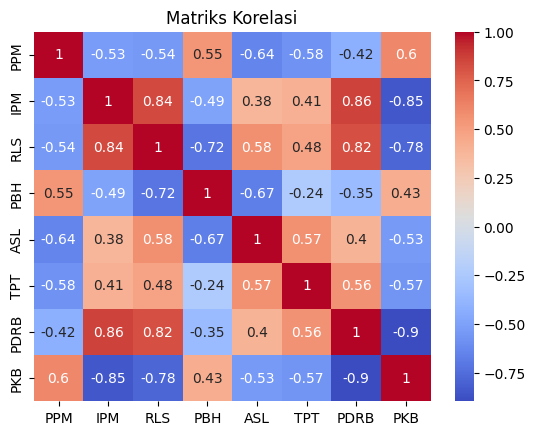

In [14]:
cor_matrix = dt.corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

Hasil matriks scatter plot dan korelasi menunjukkan bahwa peubah respon PPM memiliki hubungan positif dengan PBH dan PKB, serta hubungan negatif dengan IPM, RLS, ASL, TPT, dan PDRB. Semua peubah ini secara signifikan memiliki korelasi dengan PPM.  
  
Selain itu, terdapat banyak korelasi tinggi antar peubah penjelas, baik lebih dari 0.5 maupun kurang dari -0.5. Beberapa di antaranya adalah:  
1. RLS dan IPM memiliki korelasi 0.84.  
2. PDRB dengan IPM dan RLS masing-masing sebesar 0.86 dan 0.82.  
3. PKB dengan IPM dan PDRB menunjukkan korelasi negatif yang cukup kuat, yaitu -0.85 dan -0.9.  
  
Korelasi yang tinggi ini mengindikasikan adanya potensi multikolinearitas, yang dapat mempengaruhi keakuratan model yang akan dibentuk.  

# **Pemodelan**

## **Tanpa Fungsi**

Perhitungan nilai $\hat{\beta}$ secara matriks dapat dilakukan dengan rumus berikut.

$$
\hat{\beta}=(X'X)^{-1}X'y
$$

In [18]:
# pembentukan matriks
n = dt.shape[0]
x0 = np.ones((n, 1))
x = np.hstack((x0, dt[["IPM", "RLS", "PBH", "ASL", "TPT", "PDRB", "PKB"]]))
y = dt["PPM"].values.reshape(-1, 1)

beta_duga = np.linalg.inv(x.T @ x) @ x.T @ y
np.set_printoptions(precision=4, suppress=True)
print("Beta Duga:", beta_duga)

Beta Duga: [[49.5342]
 [-0.7714]
 [ 0.6928]
 [ 0.445 ]
 [-0.0624]
 [-2.5649]
 [ 0.0008]
 [ 0.2259]]


Hasil tersebut menjelaskan bahwa persamaan yang terbentuk adalah

$$
\hat{PPM} =49.5342-0.7714IPM+0.6928RLS+0.4450PBH-0.0624ASL-2.5649TPT+0.0008PDRB+0.2259PKB
$$

Selang kepercayaan dan pengujian signifikansi setiap parameter dapat dilakukan dengan menghitung keragaman tiap dugaan parameter. Secara umum, nilai ragam dugaan parameter $\hat{\beta_j}$ dapat dihitung melalui rumus berikut.

$$
Var(\hat{\beta_j})=\sigma^2C_{jj}
$$

dengan matriks $C$ dapat diperoleh melalui rumus berikut.

$$
C=(X'X)^{-1}
$$

In [19]:
c = np.linalg.inv(x.T @ x)

Unsur diagonal dari matriks $C$ dapat digunakan untuk menghitung nilai galat baku dari setiap dugaan parameter. Galat baku ini dapat digunakan untuk menghitung selang kepercayaan dari dugaan yang dihasilkan.

$$
S_{\hat{\beta_0}}=\sqrt{\hat{\sigma}^2c_{ii}}=\hat{\sigma}\sqrt{c_{ii}}
$$

Misal ingin dihitung selang kepercayaan dari dugaan parameter $\beta_2$, maka

In [29]:
residuals = y - (x @ beta_duga)
p = x.shape[1]
KTG = np.sum(residuals**2) / (n - p)
se_b2 = np.sqrt(KTG * c[1, 1]) # kalau di R c[2,2] karena indeks mulainya berbeda

print(f"Standar Error b2: {se_b2:.4f}")

Standar Error b2: 0.6624


In [30]:
# Interval kepercayaan beta2
from scipy.stats import t
alfa = 0.05
bb_b2 = beta_duga[2, 0] - abs(t.ppf(alfa/2, df=n-p)) * se_b2
ba_b2 = beta_duga[2, 0] + abs(t.ppf(alfa/2, df=n-p)) * se_b2
print(f"Batas Bawah beta2: {bb_b2:.4f}")
print(f"Batas Atas beta2: {ba_b2:.4f}")

Batas Bawah beta2: -0.7279
Batas Atas beta2: 2.1135


Dengan demikian, kita dapat ketahui selang kepercayaan untuk $\hat{\beta_2}$ sebagai berikut.  

$$
−0.7279<\hat{\beta_2}<2.1135
$$

Pada kasus selang kepercayaan $\hat{\beta_2}$ di atas, didapati bahwa dugaan parameter berada dalam rentang yang mengandung nilai 0. Dengan demikian, dapat dimaknai bahwa diduga nilai parameter $\hat{\beta_2}$ bernilai 0 atau tidak signifikan dalam taraf nyata 5%.

## **Dengan Fungsi**

In [32]:
model1 = smf.ols("PPM ~ IPM + RLS + PBH + ASL + TPT + PDRB + PKB", data=dt).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     3.881
Date:                Tue, 25 Feb 2025   Prob (F-statistic):             0.0148
Time:                        04:05:24   Log-Likelihood:                -60.898
No. Observations:                  22   AIC:                             137.8
Df Residuals:                      14   BIC:                             146.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.5342     52.076      0.951      0.3

Dugaan parameter model secara matriks dan fungsi menghasilkan angka yang sama, sehingga perhitungan matriks memang sudah tepat. Pada ringkasan model ini dapat dilihat bahwa tidak ada parameter yang signifikan pada taraf nyata 5%, namun secara simultan model ini signifikan dengan nilai p yang lebih kecil dari alpha yaitu 0.0148. Hal ini mengindikasi model yang buruk, kemungkinan terjadi pelanggaran asumsi sisaan maupun multikolinearitas, yang ditunjukkan pula dengan perubahan tanda korelasi pada peubah RLS.

# **Pemeriksaan Multikolinearitas**

In [33]:
def calculate_vif(df):
    X = sm.add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(len(df.columns))]
    return vif_data

print(calculate_vif(dt.drop(columns=["PPM"])))

  Feature        VIF
0     IPM   6.429484
1     RLS   9.244873
2     PBH   4.315075
3     ASL   3.269676
4     TPT   2.107777
5    PDRB  10.014754
6     PKB   7.471208


Hasil uji ini menunjukkan peubah PDRB memiliki nilai VIF yang sangat tinggi (>10), bahkan peubah IPM, RLS, dan PKB juga tergolong tinggi (>5). Pada analisis kali ini, penanganan dilakukan dengan menghapus dua peubah dengan VIF tertinggi yaitu PDRB dan RLS.

## **Pemodelan Kedua**

In [35]:
model2 = smf.ols("PPM ~ IPM + PBH + ASL + TPT + PKB", data=dt).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     4.093
Date:                Tue, 25 Feb 2025   Prob (F-statistic):             0.0139
Time:                        04:06:58   Log-Likelihood:                -63.701
No. Observations:                  22   AIC:                             139.4
Df Residuals:                      16   BIC:                             145.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2237     54.436      0.684      0.5

Persamaan yang terbentuk adalah  

$$
\hat{PPM}=37.2237-0.1500IPM+0.4272PBH-0.1050ASL-1.7176TPT+0.0599PKB
$$

In [36]:
print(calculate_vif(dt[["IPM", "PBH", "ASL", "TPT", "PKB"]]))

  Feature       VIF
0     IPM  4.607747
1     PBH  2.535496
2     ASL  3.185280
3     TPT  1.912361
4     PKB  5.177923


Model hasil reduksi peubah menunjukkan bahwa nilai VIF < 10 sehingga dinyatakan tidak terjadi multikolinearitas. Namun seluruh parameter masih tidak signifikan, padahal secara simultan model ini sudah signifikan. Artinya ada permasalahan lain yang mungkin belum tertangani, perlu dilakuan uji asumsi dan pemeriksaan pencilan, leverage, dan amatan berpengaruh

# **Pemodelan Dummy**

Untuk melakukan pemodelan regresi dengan peubah dummy, peubah kualitatif harus diubah menjadi tipe kategori agar bisa dilakukan regresi. Nilai yang menjadi referensi pemodelan jika langsung menggunakan `data["peubah"].astype("category")` adalah nilai dengan urutan abjad pertama, pada data ini adalah "Agak Rentan"


In [37]:
data["UHH"] = data["UHH"].astype("category")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   PPM     22 non-null     float64 
 1   IPM     22 non-null     float64 
 2   RLS     22 non-null     float64 
 3   PBH     22 non-null     float64 
 4   ASL     22 non-null     float64 
 5   TPT     22 non-null     float64 
 6   PDRB    22 non-null     int64   
 7   PKB     22 non-null     float64 
 8   UHH     22 non-null     category
dtypes: category(1), float64(7), int64(1)
memory usage: 1.7 KB
None


In [38]:
model3 = smf.ols("PPM ~ IPM + RLS + PBH + ASL + TPT + PDRB + PKB + C(UHH)", data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2.337
Date:                Tue, 25 Feb 2025   Prob (F-statistic):             0.0899
Time:                        04:09:03   Log-Likelihood:                -60.228
No. Observations:                  22   AIC:                             142.5
Df Residuals:                      11   BIC:                             154.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 38

Persamaan yang terbentuk dari pemodelan ini adalah sebagai berikut:  

$$
\hat{PPM}=38.5656-0.5109IPM-0.5993RLS+0.4130PBH-0.0473ASL-2.5701TPT+0.0012PDRB+0.2579PKB-4.8089UHH_{AgakTahan}-10.0811UHH_{SangatTahan}-3.0576UHH_{Tahan}
$$

Interpretasi pada peubah dengan nilai kuantitatif sama seperti interpretasi biasanya, yang berbeda hanya pada peubah dummynya. Pada persamaan tersebut, interpretasi yang dapat ditulis adalah sebagai berikut  
1. Wilayah dengan kondisi UHH Agak Tahan memiliki dugaan rata-rata persentase penduduk miskin 4.8089% lebih rendah dibanding dengan wilayah yang memiliki tingkat kondisi UHH Agak Rentan  
2. Wilayah dengan kondisi UHH Sangat Tahan memiliki dugaan rata-rata persentase penduduk miskin 10.0811% lebih rendah dibanding dengan wilayah yang memiliki tingkat kondisi UHH Agak Rentan  
1. Wilayah dengan kondisi UHH Tahan memiliki dugaan rata-rata persentase penduduk miskin 3.0576% lebih rendah dibanding dengan wilayah yang memiliki tingkat kondisi UHH Agak Rentan  

# **Uji Hipotesis Kesamaan Parameter Regresi**

Misal ingin dilakukan pemodelan dengan peubah respon Persentase Penduduk Miskin dengan 4 peubah penjelas, yaitu IPM, RLS, TBH, TPT


In [40]:
model4 = smf.ols("PPM ~ IPM + RLS + PBH + TPT", data=dt).fit()
print(model4.summary())
print(calculate_vif(dt[["IPM", "RLS", "PBH", "TPT"]]))

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     5.501
Date:                Tue, 25 Feb 2025   Prob (F-statistic):            0.00498
Time:                        04:12:04   Log-Likelihood:                -63.626
No. Observations:                  22   AIC:                             137.3
Df Residuals:                      17   BIC:                             142.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.3386     22.244      2.308      0.0

Regresi yang dihasilkan tidak mengalami masalah multikolinearitas. Hasil tersebut menunjukkan bahwa peubah PBH dan TPT signifikan pada taraf nyata 5%, sedangkan IPM dan RLS tidak signifikan. Berikut adalah persamaan yang terbentuk

$$
\hat{PPM}=51.3386-0.7469IPM+2.9004RLS+1.0000PBH-2.9849TPT
$$

Hasil pemodelan tersebut dapat dilakukan serangkaian uji untuk memeriksa apakah $\beta_3$ dan $\beta_4$ dapat diasumsikan sama ketika parameter lainnya tidak signifikan atau diasumsikan sama dengan nol.  

Hipotesis yang diuji adalah  
$$
H_0:\beta_3=\beta_4\\
H_1:\beta_3\ne\beta_4
$$

Karena peubah IPM dan RLS tidak signifikan maka dapat diasumsikan nol sehingga model dapat disederhanakan menjadi:

$$
PPM=\beta_0+\beta_3PBH+\beta_4TPT+\varepsilon
$$

Jika $H_0$ benar $(\beta_3=\beta_4=\beta_1')$, model bisa ditulis ulang sebagai

$$
PPM=\beta_0'+\beta_1'(PBH+TPT)+\varepsilon
$$

In [41]:
dt["X_new"] = dt["PBH"] + dt["TPT"]
model_full = smf.ols("PPM ~ PBH + TPT", data=dt).fit()
model_restricted = smf.ols("PPM ~ X_new", data=dt).fit()
print(sm.stats.anova_lm(model_restricted, model_full))

   df_resid         ssr  df_diff     ss_diff          F    Pr(>F)
0      20.0  821.639455      0.0         NaN        NaN       NaN
1      19.0  469.489326      1.0  352.150129  14.251341  0.001281


Hasil perbandingan menunjukkan bahwa nilai p kurang dari alpha sehingga dapat disimpulkan bahwa tolak H0, artinya peubah PBH dan TPT berbeda secara signifikan sehingga tidak dapat digabung. Selanjutnya daoat dipilih apakah akan menggunakan peubah dengan 4 peubah atau hanya 2 peubah berdasarkan indikator Adjusted R-Squared, AIC, dan BIC.

In [42]:
# Perbandingan Model
model_all = smf.ols("PPM ~ IPM + RLS + PBH + TPT", data=dt).fit()
model_signif = smf.ols("PPM ~ PBH + TPT", data=dt).fit()

comparison = pd.DataFrame({
    "Model": ["Peubah Penuh", "Peubah Signifikan"],
    "Adjusted_R2": [model_all.rsquared_adj, model_signif.rsquared_adj],
    "AIC": [model_all.aic, model_signif.aic],
    "BIC": [model_all.bic, model_signif.bic]
})
print(comparison)

               Model  Adjusted_R2         AIC         BIC
0       Peubah Penuh     0.461609  137.252612  142.707824
1  Peubah Signifikan     0.459967  135.766564  139.039691


erdasarkan indikator Adjusted R square, AIC, dan BIC maka model dengan hanya dua peubah dipilih sebagai model yang terbaik.

In [43]:
print(model_signif.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     9.943
Date:                Tue, 25 Feb 2025   Prob (F-statistic):            0.00111
Time:                        04:14:17   Log-Likelihood:                -64.883
No. Observations:                  22   AIC:                             135.8
Df Residuals:                      19   BIC:                             139.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.6845      4.051      6.340      0.0

Persamaan yang terbentuk adalah sebagai berikut

$$
\hat{PPM}=25.6845+0.8096PBH-2.9286TPT
$$